In [2]:
# 16 Jan 2023.
# Author : Billionare & Professor Akhona Njeje :-).
# ML project on Music recomendation.
# This project aims to be a Framework & compas for any beginner in ML.



# ---> Gather Data & Load Libraries

import pandas as pd
import numpy as np
import matplotlib as plot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
# om sklearn.externals import joblib   # This lib helps us save & load models.

df = pd.read_csv('musicZA.csv')

In [3]:
# ---> Lets Inspect & Analyse our Dataset/frame.

# df = dataset = dataframe = Table & all its values.
# df.head() = 1st 5rows of our df.
# df.shape = (Rows, Columns).
# df.describe() = Descriptive Statistics = Mean, Std Dev, Variance etc,...
#                 on each column.
# df.values = array([[1,a], [2,b], [3,c]]) info on our dataset.

df.head()   # Gender = 1(Male) & 0(Female).

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,House
4,29,1,House


In [4]:
df.shape

(18, 3)

In [5]:
df.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [6]:
df.values

array([[20, 1, 'HipHop'],
       [23, 1, 'HipHop'],
       [25, 1, 'HipHop'],
       [26, 1, 'House'],
       [29, 1, 'House'],
       [30, 1, 'House'],
       [31, 1, 'Classical'],
       [33, 1, 'Classical'],
       [37, 1, 'Classical'],
       [20, 0, 'Dance'],
       [21, 0, 'Dance'],
       [25, 0, 'Dance'],
       [26, 0, 'Piano'],
       [27, 0, 'Piano'],
       [30, 0, 'Piano'],
       [31, 0, 'Gospel'],
       [34, 0, 'Gospel'],
       [35, 0, 'Gospel']], dtype=object)

In [7]:
# ---> Cleaning data.

print(df.isnull())   # Is Our data clean?.If yes, proceed to Prep :-).

      age  gender  genre
0   False   False  False
1   False   False  False
2   False   False  False
3   False   False  False
4   False   False  False
5   False   False  False
6   False   False  False
7   False   False  False
8   False   False  False
9   False   False  False
10  False   False  False
11  False   False  False
12  False   False  False
13  False   False  False
14  False   False  False
15  False   False  False
16  False   False  False
17  False   False  False


In [8]:
# ---> Split the data into input & output.

X = df.drop(columns = ['genre'])   # This will be our Input dataset = X.
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [9]:
y = df['genre']   # This will be our Output dataset = y.
y

0        HipHop
1        HipHop
2        HipHop
3         House
4         House
5         House
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12        Piano
13        Piano
14        Piano
15       Gospel
16       Gospel
17       Gospel
Name: genre, dtype: object

In [10]:
# ---> Model creation using ML Algorithms.
#      Note: Theres alot of ML Algorithms & each produces different results.

model = DecisionTreeClassifier()   
model.fit(X, y)   # Training our model to learn from patterns in our data.
#                   -fit(Input set, Output set).



# Lets make a prediction & see if our model works.

prediction = model.predict([[28, 1]])
print("Prediction =", prediction)

prediction1 = model.predict([[21, 1], [22, 0]])
print("Prediction1 =", prediction1)

prediction2 = model.predict([[31, 0]])
print("Prediction2 =", prediction2)

Prediction = ['House']
Prediction1 = ['HipHop' 'Dance']
Prediction2 = ['Gospel']


C:\Users\Akhona.Njeje\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Akhona.Njeje\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Akhona.Njeje\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [11]:
# ---> Measuring Accuracy of a model.
#      We need to split our dataset into training & testing before.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)   # 20% of our data is for Testing.
model.fit(X_train, y_train)
predictions = model.predict(X_test)

Acc_score = accuracy_score(y_test, predictions)
print("Accuracy Score = ", Acc_score*100,"%.")   # Our Accuracy changes by big margins,
#                                                  reason is small dataset.

# ---> Model Persistance.
#      Persistance uses a method called JobLib.dump(model_name, 'file_name-recommender.job')

# joblib.dump(model, 'musicZA-recommender.joblib')

Accuracy Score =  100.0 %.


In [12]:
# ---> Visualising code on Decision Trees.

tree.export_graphviz(model, out_file = 'musicZA-recommender.dot',
                    feature_names = ['age', 'gender'], 
                    class_names = sorted(y.unique()), label = 'all', rounded=True,
                    filled = True)

# This code will produce a file that shows us how our model goes about,
# making a decision.

# How to Visualise a dot file?
#        1. Install an Extension called GraphViz on your VSC terminal.
#        2.Click on "..." & click on "Open Preview". 

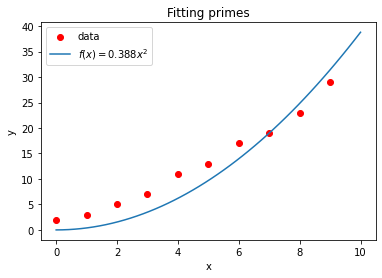

In [13]:
# matplotlib Bonus lecture.

import matplotlib.pyplot as plt

def found_fit(x):
    return 0.388 * x**2  # Found with symfit.

x_data = list(range(10))
y_data = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

x_func = np.linspace(0, 10, 50)
# numpy will do the right thing and evaluate found_fit for all elements
y_func = found_fit(x_func)

# From here the plotting starts

plt.scatter(x_data, y_data, c='r', label='data')
plt.plot(x_func, y_func, label='$f(x) = 0.388 x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting primes')
plt.legend()
plt.show()

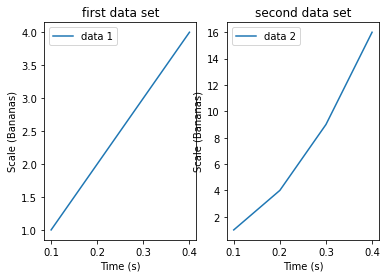

In [14]:
x_data1 = [0.1, 0.2, 0.3, 0.4]
y_data1 = [1, 2, 3, 4]

x_data2 = [0.1, 0.2, 0.3, 0.4]
y_data2 = [1, 4, 9, 16]

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(x_data1, y_data1, label='data 1')
ax2.plot(x_data2, y_data2, label='data 2')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Scale (Bananas)')
ax1.set_title('first data set')
ax1.legend()
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Scale (Bananas)')
ax2.set_title('second data set')
ax2.legend()

plt.show()